In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,classification_report,roc_auc_score, roc_curve
#from sklearn.datasets import load_boston
#from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('C:\\Users\\kandanulus\\MyTestlab\\DPL\\Salary\\Salary_Data.csv')

In [104]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [105]:
import tensorflow as tf

In [106]:
df.shape

(31, 2)

In [107]:
df.isnull().sum()

YearsExperience    1
Salary             1
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [110]:
df.shape

(30, 2)


# X (feature) : Standard Scaler
# Y(label) : MinMaxScaler [0 to 1]


In [111]:
X=df.iloc[:,[0]].values
y=df.iloc[:,[1]].values

In [112]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [113]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

# scale the features and labels

In [114]:
from sklearn.preprocessing import StandardScaler
stdscl = StandardScaler()
X_scaled = stdscl.fit_transform(X)
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
y_label = minmax.fit_transform(y)

In [115]:
y_label

array([[0.01904087],
       [0.1000945 ],
       [0.        ],
       [0.06843846],
       [0.02551382],
       [0.22337586],
       [0.26481219],
       [0.19742499],
       [0.31554453],
       [0.229837  ],
       [0.30105126],
       [0.21335932],
       [0.22709662],
       [0.2285613 ],
       [0.27616348],
       [0.35680369],
       [0.33425467],
       [0.53575478],
       [0.51537916],
       [0.66393811],
       [0.63792818],
       [0.7151193 ],
       [0.75089771],
       [0.89866525],
       [0.84691708],
       [0.80145287],
       [0.93595559],
       [0.88476258],
       [1.        ],
       [0.9938696 ]])

In [116]:
minmax.inverse_transform(np.array([[0.9938696]]))

array([[121872.000336]])

In [126]:
# split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_label, test_size = 0.30, random_state = 10)

In [127]:
X_train

array([[-1.43837321],
       [ 0.2461004 ],
       [-0.29149756],
       [ 0.21026054],
       [-0.82909552],
       [-0.47069688],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.78721455],
       [ 0.92705781],
       [-0.50653674],
       [ 1.50049564],
       [ 1.85889428],
       [-0.75741579],
       [ 1.32129632],
       [-0.07645838],
       [-0.00477865],
       [-1.51005294],
       [-0.1481381 ],
       [-1.11581443],
       [-0.57821647]])

In [128]:
y_train

array([[0.1000945 ],
       [0.66393811],
       [0.27616348],
       [0.51537916],
       [0.26481219],
       [0.21335932],
       [0.89866525],
       [0.84691708],
       [1.        ],
       [0.75089771],
       [0.30105126],
       [0.93595559],
       [0.9938696 ],
       [0.31554453],
       [0.80145287],
       [0.33425467],
       [0.53575478],
       [0.01904087],
       [0.35680369],
       [0.02551382],
       [0.229837  ]])

#Model Archtecture

In [129]:
model = tf.keras.models.Sequential()

#HL1 and input layer...

model.add(tf.keras.layers.Dense(units=5, activation = 'relu', input_shape=(1,)))

#HL-2...

model.add(tf.keras.layers.Dense(units=4, activation = 'relu'))

#Output Layer..

model.add(tf.keras.layers.Dense(units=1, activation = 'linear'))

# Model Compilation

In [130]:
model.compile(optimizer='sgd',
             loss = 'mean_squared_error',
             metrics = ['mean_squared_error'])

In [131]:
mdl_history = model.fit (X_train, y_train, 
                         epochs=200, 
                         validation_data=(X_test,y_test))

Epoch 1/200
1/1 [==============================] - 0s 428ms/step - loss: 0.1581 - mean_squared_error: 0.1581 - val_loss: 0.1781 - val_mean_squared_error: 0.1781
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 0.1726 - val_mean_squared_error: 0.1726
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 0.1504 - mean_squared_error: 0.1504 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 4/200
1/1 [==============================] - 0s 28ms/step - loss: 0.1467 - mean_squared_error: 0.1467 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 5/200
1/1 [==============================] - 0s 31ms/step - loss: 0.1431 - mean_squared_error: 0.1431 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 6/200
1/1 [==============================] - 0s 29ms/step - loss: 0.1397 - mean_squared_error: 0.1397 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 7/200
1/1 [======================

In [93]:
mdl_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

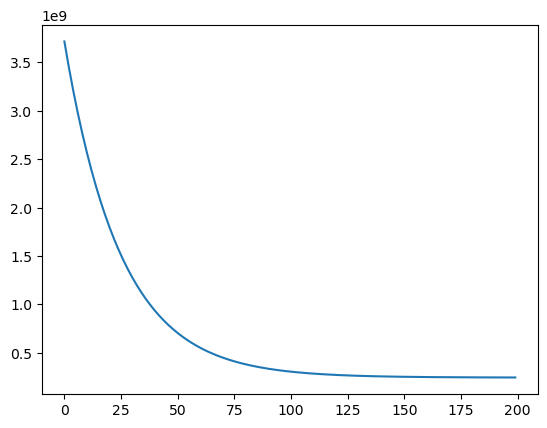

In [62]:
plt.plot(mdl_history.history['mean_squared_error'])

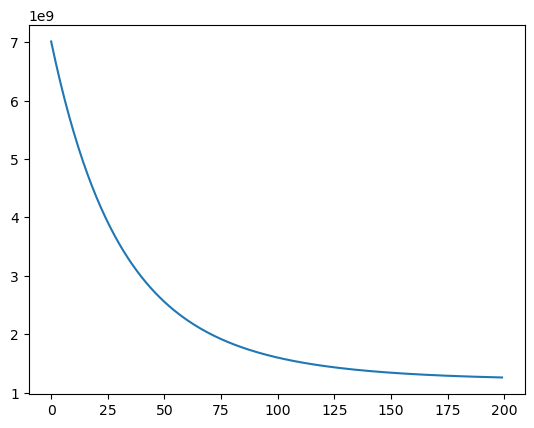

In [63]:
plt.plot(mdl_history.history['val_mean_squared_error'])

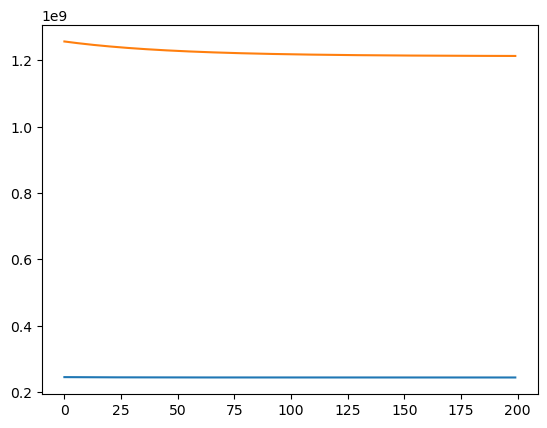

In [66]:
plt.plot(mdl_history.history['mean_squared_error'])
plt.plot(mdl_history.history['val_mean_squared_error'])